In [173]:
# Load required libraries

from bs4 import BeautifulSoup
import requests

import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re

import pandas as pd
import numpy as np
import dateutil.parser
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

In [3]:
# df_movies_2011_full /// ('2011_Top_WorldWide_Box_Office.csv')
df_movies_2011_full = pd.read_csv('2011_Top_WorldWide_Box_Office.csv')
df_movies_2011_full.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,link_stub,Rank,Release_Group,World_Wide_Profit,Domestic,Domestic_GToD_Percent,Foreign,Foreign_GToD_Percent,movie_title,domestic_total_gross,runtime_minutes,rating,release_date,budget
0,0,0,0,Harry Potter and the Deathly Hallows: Part 2,/releasegroup/gr2033603077/?ref_=bo_ydw_table_1,1,Harry Potter and the Deathly Hallows: Part 2,1341511219,381011219.0,28.4%,960500000,71.6%,Harry Potter and the Deathly Hallows: Part 2,381409310,130.0,PG-13,2011-07-13,500000
1,1,1,1,Transformers: Dark of the Moon,/releasegroup/gr6312453/?ref_=bo_ydw_table_2,2,Transformers: Dark of the Moon,1123794079,352390543.0,31.4%,771403536,68.6%,Transformers: Dark of the Moon,352390543,154.0,PG-13,2011-06-29,195000000
2,2,2,2,Pirates of the Caribbean: On Stranger Tides,/releasegroup/gr2121159173/?ref_=bo_ydw_table_3,3,Pirates of the Caribbean: On Stranger Tides,1045713802,241071802.0,23.1%,804642000,76.9%,Pirates of the Caribbean: On Stranger Tides,241071802,137.0,PG-13,2011-05-18,250000000
3,3,3,3,The Twilight Saga: Breaking Dawn - Part 1,/releasegroup/gr205607429/?ref_=bo_ydw_table_4,4,The Twilight Saga: Breaking Dawn - Part 1,712205856,281287133.0,39.5%,430918723,60.5%,The Twilight Saga: Breaking Dawn,281287133,117.0,PG-13,2011-11-16,110000000
4,4,4,4,Mission: Impossible - Ghost Protocol,/releasegroup/gr2708492805/?ref_=bo_ydw_table_5,5,Mission: Impossible - Ghost Protocol,694713380,209397903.0,30.1%,485315477,69.9%,Mission: Impossible,209397903,132.0,PG-13,2011-12-14,145000000


In [25]:
df_movies_2011_full_cleaned =df_movies_2011_full[['Rank','movie_title','World_Wide_Profit','Domestic','Foreign','runtime_minutes','release_date','budget']]
df_movies_2011_full_cleaned.head(10)

,Rank,movie_title,World_Wide_Profit,Domestic,Foreign,runtime_minutes,release_date,budget
0,1,Harry Potter and the Deathly Hallows: Part 2,1341511219,381011219.0,960500000,130.0,2011-07-13,500000
1,2,Transformers: Dark of the Moon,1123794079,352390543.0,771403536,154.0,2011-06-29,195000000
2,3,Pirates of the Caribbean: On Stranger Tides,1045713802,241071802.0,804642000,137.0,2011-05-18,250000000
3,4,The Twilight Saga: Breaking Dawn,712205856,281287133.0,430918723,117.0,2011-11-16,110000000
4,5,Mission: Impossible,694713380,209397903.0,485315477,132.0,2011-12-14,145000000
5,6,Kung Fu Panda 2,665692281,165249063.0,500443218,90.0,2011-05-26,150000000
6,7,Fast Five,626137675,209837675.0,416300000,130.0,2011-04-20,125000000
7,8,The Hangover Part II,586764305,254464305.0,332300000,102.0,2011-05-25,80000000
8,9,The Smurfs,563749323,142614158.0,421135165,103.0,2011-07-27,110000000
9,10,Cars 2,559852396,191452396.0,368400000,106.0,2011-06-22,200000000


In [26]:
df_movies_2011_full_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               200 non-null    int64  
 1   movie_title        200 non-null    object 
 2   World_Wide_Profit  200 non-null    int64  
 3   Domestic           153 non-null    float64
 4   Foreign            200 non-null    int64  
 5   runtime_minutes    193 non-null    float64
 6   release_date       200 non-null    object 
 7   budget             200 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 12.6+ KB


In [48]:
df_movies_2011_full_cleaned = df_movies_2011_full_cleaned.fillna(0)

In [49]:
df_movies_2011_full_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               200 non-null    int64  
 1   movie_title        200 non-null    object 
 2   World_Wide_Profit  200 non-null    int64  
 3   Domestic           200 non-null    float64
 4   Foreign            200 non-null    int64  
 5   runtime_minutes    200 non-null    float64
 6   release_date       200 non-null    object 
 7   budget             200 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 12.6+ KB


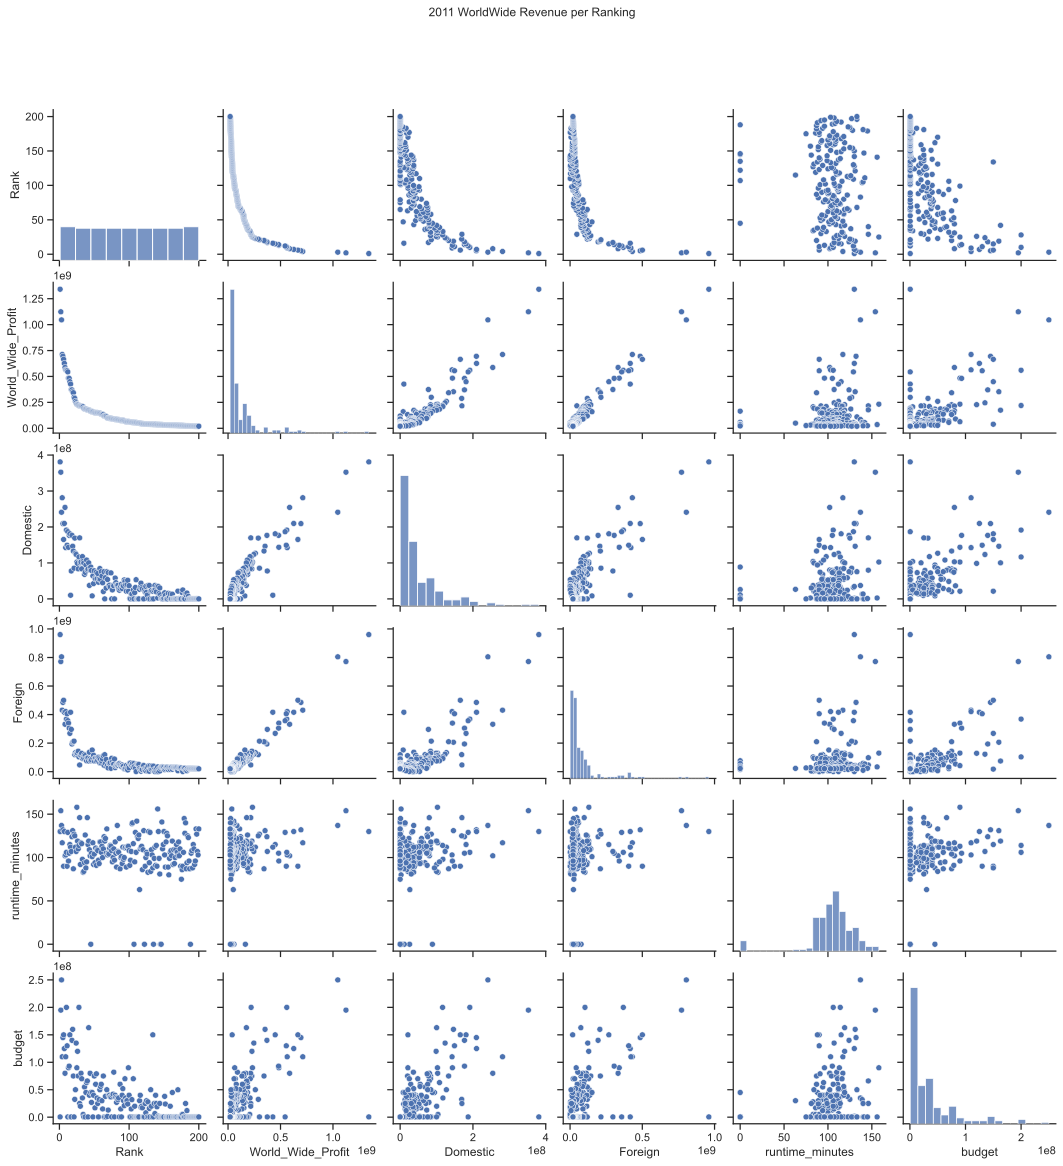

In [171]:
plt=sns.pairplot(df_movies_2011_full_cleaned)
plt.fig.suptitle("2011 WorldWide Revenue per Ranking", y=1.08)
plt.fig.set_size_inches(15,15)
plt.savefig('2011 WorldWide Revenue per Ranking.png', dpi=100, bbox_inches='tight')

In [140]:
df_train, df_test = train_test_split(df_movies_2011_full_cleaned, test_size=0.2, random_state = 10)

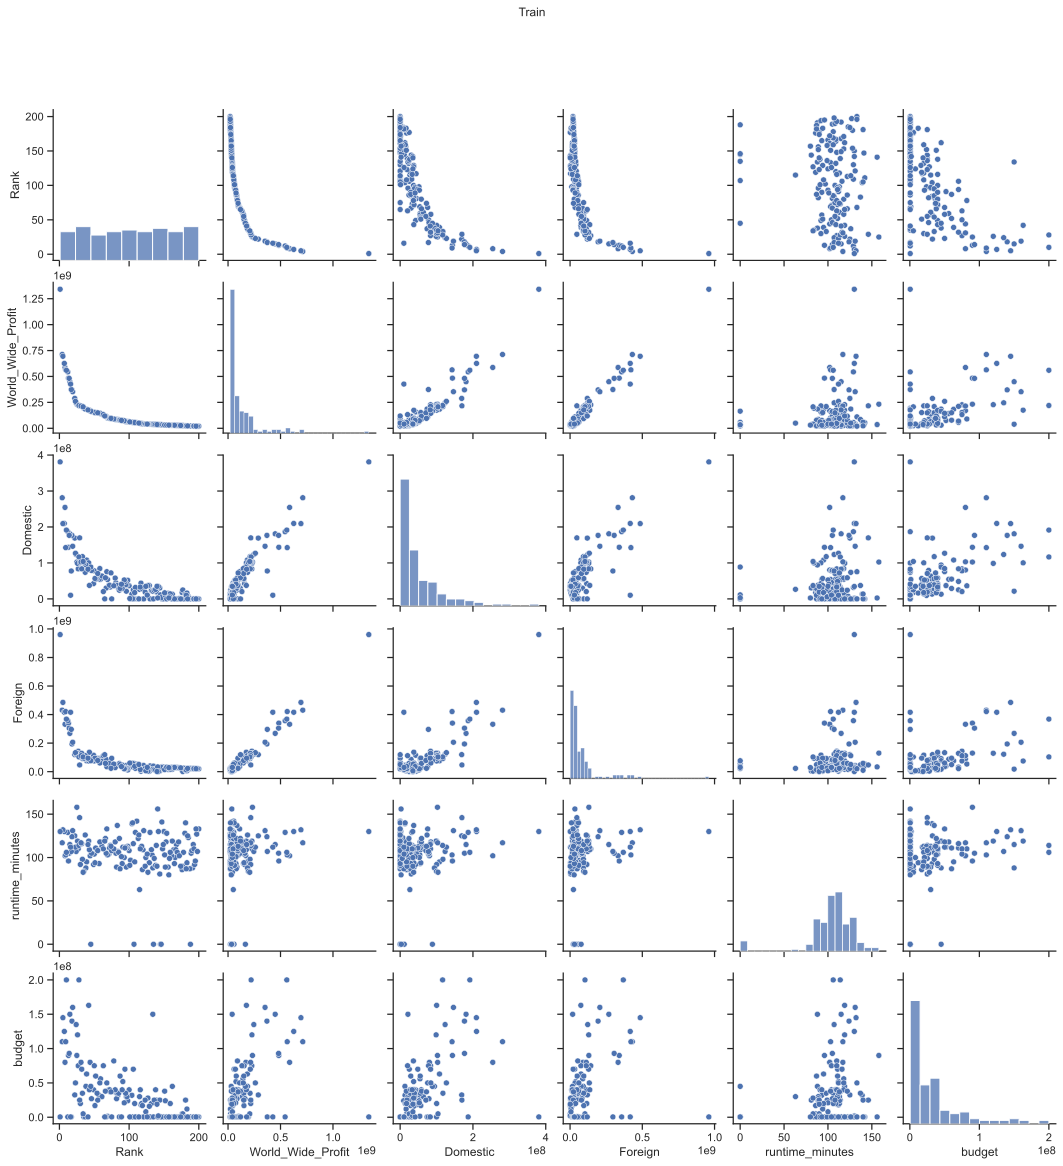

In [141]:
plt=sns.pairplot(df_train)
plt.fig.suptitle("Train", y=1.08)
plt.fig.set_size_inches(15,15)
# plt.savefig('2011 WorldWide Revenue per Ranking.png', dpi=100, bbox_inches='tight')

In [69]:
x = df_train['World_Wide_Profit']
y = df_train['Domestic']

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Domestic   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              1412.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):                    5.60e-81
Time:                        04:43:02   Log-Likelihood:                         -2952.0
No. Observations:                 160   AIC:                                      5906.
Df Residuals:                     159   BIC:                                      5909.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
World_Wide_Profit     0.3482      0.009     37.571      0.000       0.330       0.367
==============================================================================
Omnibus:                       57.159   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.605
Skew:                          -1.053   Prob(JB):                     1.54e-90
Kurtosis:                      10.590   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
X = df_train['budget'].values.reshape(-1, 1)

# Choose the response variable
y = df_train['World_Wide_Profit']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [71]:
# Create an empty model
lr_full = LinearRegression()

# Features
X = df_train[['Domestic', 'budget']]

# Target
y = df_train['World_Wide_Profit']

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.8496617232351313

In [176]:
# Create an empty model
lr_full = LinearRegression()

# Features
X2 = df_train[['Foreign', 'budget']]

# Target
y2 = df_train['World_Wide_Profit']

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.9357480383079287

In [142]:
x = df_train['World_Wide_Profit']
y = df_train['Domestic']

model = sm.OLS(y,x).fit()
prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Domestic   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              1412.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):                    5.60e-81
Time:                        06:39:37   Log-Likelihood:                         -2952.0
No. Observations:                 160   AIC:                                      5906.
Df Residuals:                     159   BIC:                                      5909.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
World_Wide_Profit     0.3482      0.009     37.571      0.000       0.330       0.367
==============================================================================
Omnibus:                       57.159   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.605
Skew:                          -1.053   Prob(JB):                     1.54e-90
Kurtosis:                      10.590   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# Residuals

y=df_train['World_Wide_Profit']
x=df_train['Domestic']

x=sm.add_constant(x)

model=sm.OLS(y,x).fit()

In [145]:
influence=model.get_influence()

standarized_residuals = influence.resid_studentized_internal

print (standarized_residuals)

[ 2.52415406e-01 -9.97095517e-01  1.43344275e-01 -2.40285256e-01
 -2.13316144e-02  1.14163711e-01  2.92184102e-01  2.24753218e-01
  5.02018966e-02 -1.01777439e+00 -4.85588410e-01 -5.79051221e-01
  8.24574873e-01  3.70272965e-01 -2.18300503e+00 -4.56825546e-01
 -3.45851321e-01 -2.83215602e-02 -3.47485506e-01 -7.41452280e-01
  5.61398194e-01  7.26115076e-01  7.87135164e-02  3.59922318e-01
  2.42647368e-01 -6.26432769e-01  3.67423396e-01 -3.35051237e-01
 -1.27893949e+00  5.12092758e-01  5.57927507e-01 -1.41307573e+00
  2.25953458e-01 -1.16981640e-01 -5.08387599e-01  3.92274606e-01
 -2.72231698e-01  3.60293732e-01 -5.65242770e-01 -1.25239334e+00
 -4.88608475e-01 -2.53191532e-01 -1.38741072e+00  3.38788007e-01
  6.59367123e-01 -4.16071042e-01  4.18903522e-02 -1.70182386e-01
 -1.24693764e+00  2.36912985e-01  7.31273006e-02 -2.38421649e-01
 -2.16542301e-01  8.69043406e-02  2.07051276e-03 -6.44229422e-01
 -1.25750698e-01 -1.08127660e+00  4.25016633e-01  2.57527115e-01
 -8.68849001e-01  2.52577

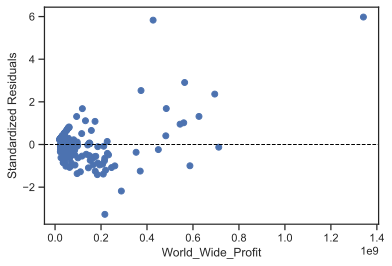

In [174]:
plt.scatter(df_train['World_Wide_Profit'], standarized_residuals)
plt.xlabel('World_Wide_Profit')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.savefig('World_Wide_Profit_Residual_Train.png', dpi=100, bbox_inches='tight')
plt.show()

In [90]:
# diagnostic_plots(df_test['World_Wide_Profit'], df_train['World_Wide_Profit'], standarized_residuals)

In [150]:
features , target = ['budget', 'Domestic'], ['World_Wide_Profit']
x, y = df_train[features], df_train[target]

lm = LinearRegression() # construct LinearRegression model object
lm.fit(x, y) #fit model to our choice of features

LinearRegression()

In [151]:
# extract feature coefficients and intercept from fit model
print(lm.intercept_)
print(lm.coef_)

[9191162.67200628]
[[-0.38315508  2.70407714]]


In [153]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y,preds)

World_Wide_Profit    4.841045e+18
dtype: float64

In [102]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y,preds)

World_Wide_Profit    1.739440e+08
dtype: float64

In [103]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

World_Wide_Profit    8.205373e+07
dtype: float64

In [105]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

World_Wide_Profit   -0.028539
dtype: float64

In [106]:
lm.score(x,y)

-0.028539338325057395

In [107]:
df_train.corr()

,Rank,World_Wide_Profit,Domestic,Foreign,runtime_minutes,budget
Rank,1.000000,-0.716131,-0.776393,-0.637734,-0.142483,-0.604901
World_Wide_Profit,-0.716131,1.000000,0.918670,0.977971,0.166148,0.497917
Domestic,-0.776393,0.918670,1.000000,0.815974,0.166772,0.607323
Foreign,-0.637734,0.977971,0.815974,1.000000,0.155018,0.407736
runtime_minutes,-0.142483,0.166148,0.166772,0.155018,1.000000,0.134769
budget,-0.604901,0.497917,0.607323,0.407736,0.134769,1.000000


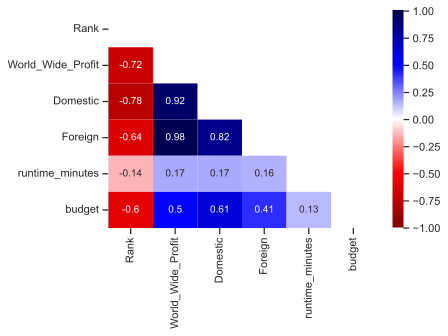

In [175]:
upper = np.triu(df_train.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(df_train.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

plt.savefig('Heat_Map_Train.png', dpi=100, bbox_inches='tight')

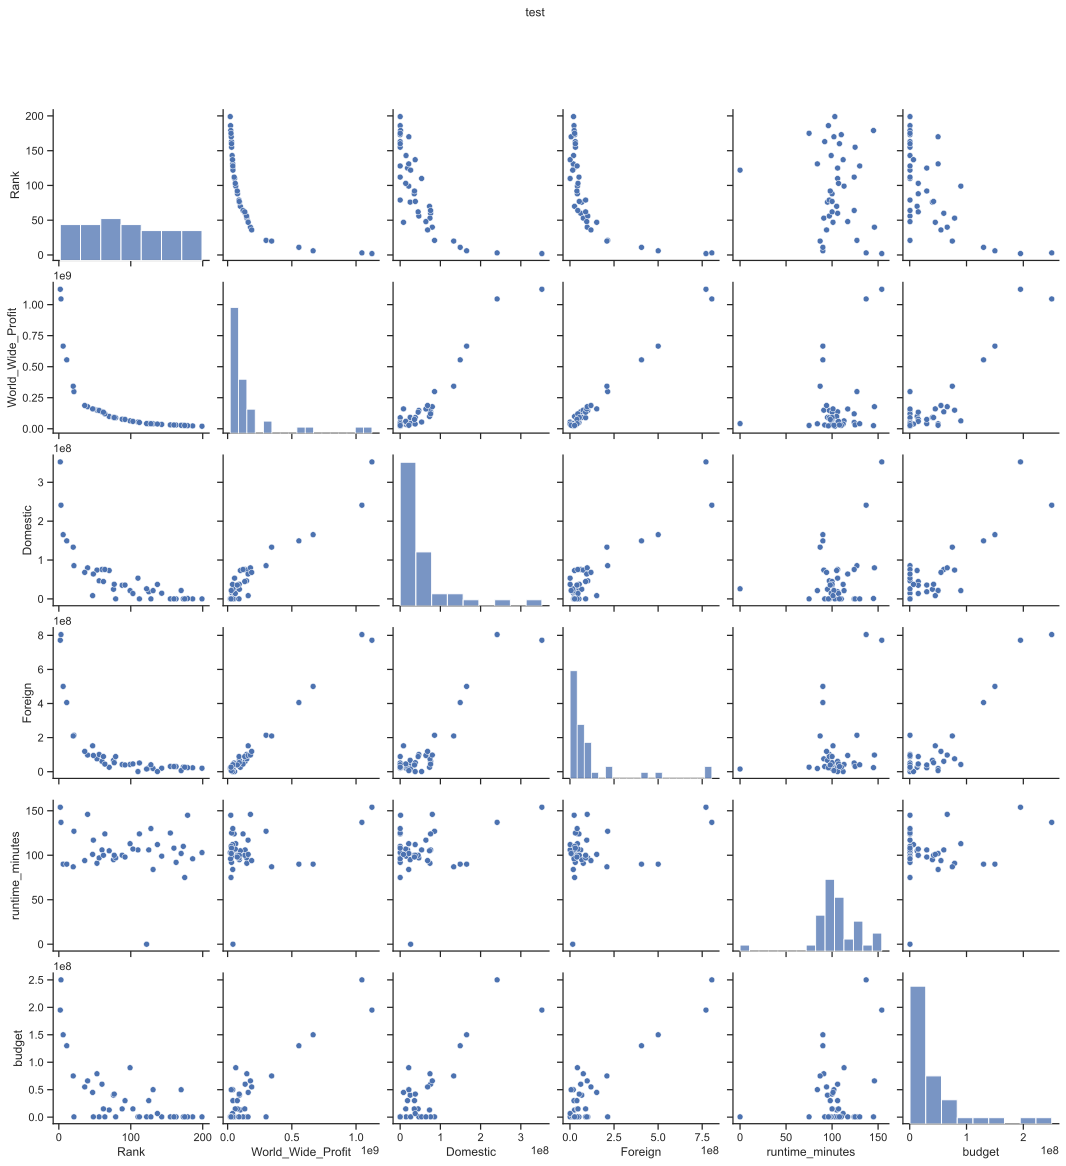

In [112]:
# do same above with df_test

plt=sns.pairplot(df_test)
plt.fig.suptitle("test", y=1.08)
plt.fig.set_size_inches(15,15)
# plt.savefig('World_Wide_Profit_Residual_Test.png', dpi=100, bbox_inches='tight')

In [158]:
# Create an empty model
lr1 = LinearRegression()

# Choose just the X1 column for our data
X1 = df_test['budget'].values.reshape(-1, 1)

# Choose the response variable
y1 = df_test['World_Wide_Profit']

# Fit the model 
lr.fit(X1, y1)

LinearRegression()

In [159]:
# Create an empty model
lr_full = LinearRegression()

# Features
X1 = df_test[['Domestic', 'budget']]

# Target
y1 = df_test['World_Wide_Profit']

# Fit  
lr_full.fit(X1, y1)

# Score
lr_full.score(X1, y1)

0.9357480383079287

In [160]:
x1 = df_test['World_Wide_Profit']
y1 = df_test['Domestic']

model = sm.OLS(y1,x1).fit()
predictions = model.predict(x1)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Domestic   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              571.5
Date:                Fri, 01 Oct 2021   Prob (F-statistic):                    6.63e-25
Time:                        06:46:27   Log-Likelihood:                         -733.48
No. Observations:                  40   AIC:                                      1469.
Df Residuals:                      39   BIC:                                      1471.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
World_Wide_Profit     0.2839      0.012     23.907      0.000       0.260       0.308
==============================================================================
Omnibus:                        1.397   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.700
Skew:                          -0.300   Prob(JB):                        0.705
Kurtosis:                       3.244   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
influence1=model.get_influence()

standarized_residuals1 = influence1.resid_studentized_internal

print (standarized_residuals1)

[ 1.64172341 -1.12438964  0.02296072 -0.25511426  1.4095631   1.61618503
 -0.37897585  0.2052828   1.99496372 -2.96637776  0.14481217 -0.38472628
 -0.05260947  0.20627654  0.29570152  1.84669242  1.68547225 -1.1184825
 -0.64411819 -0.28800089 -0.39049273  0.44165976  0.30213128  0.58659456
 -0.13388792  0.62829396  1.17443779  1.83707706  0.83772759 -0.33917433
 -0.38092633  1.31346005  0.53478319  0.63507154  0.67042496 -0.2683114
 -0.51114095  0.60546535 -1.65376155 -0.33283597]


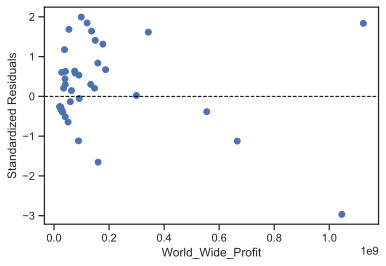

In [162]:
plt.scatter(df_test['World_Wide_Profit'], standarized_residuals1)
plt.xlabel('World_Wide_Profit')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# plt.savefig('World_Wide_Profit_Residual_Test.png', dpi=100, bbox_inches='tight')
plt.show()

In [164]:
features , target = ['budget', 'Domestic'], ['World_Wide_Profit']
x1, y1= df_test[features], df_test[target]

lm = LinearRegression() # construct LinearRegression model object
lm.fit(x1, y1) #fit model to our choice of features

LinearRegression()

In [165]:
# extract feature coefficients and intercept from fit model
print(lm.intercept_)
print(lm.coef_)

[-14470030.3888973]
[[1.35213325 2.46237745]]


In [170]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y1,preds1)

NameError: name 'preds1' is not defined

In [157]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y1,preds1)

ValueError: Unable to coerce to DataFrame, shape must be (40, 1): given (160, 1)

In [ ]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y1,preds1)

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y1,preds1)

In [ ]:
lm.score(x,y)

In [ ]:
df_test.corr()

In [ ]:
upper1 = np.triu(df_test.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(df_test.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper1);

# plt.savefig('Heat_Map_Train.png', dpi=100, bbox_inches='tight')

-------